# Basic Introduction and Summary of Assignment

In this assignment, we will be working with the Titanic dataset. The goal is to load, preprocess, and analyze the data to gain insights into the factors that influenced the survival of passengers. We will perform various data preprocessing steps such as handling missing values, encoding categorical variables, and feature scaling.

## Loading and Preprocessing of the Titanic Dataset

We will start by loading the Titanic dataset and performing necessary preprocessing steps to prepare the data for analysis. This includes:

1. Handling missing values.
2. Encoding categorical variables.
3. Feature scaling.


# Titanic Dataset Description

1. **survival**: Survival (0 = No; 1 = Yes).
2. **class**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd).
3. **name**: Name.
4. **sex**: Sex.
5. **sibsp**: Number of Siblings/Spouses Aboard.
6. **parch**: Number of Parents/Children Aboard.
7. **ticket**: Ticket Number.
8. **fare**: Passenger Fare.
9. **cabin**: Cabin.
10. **embarked**: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
11. **boat**: Lifeboat (if survived).
12. **body**: Body number (if did not survive and the body was recovered).


In [213]:
# THIS IS FOR PERFORMANCE SAVING, DO NOT USE IN PRODUCTION, DISABLE WHEN TURNING IN
DEBUG=True

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from boruta import BorutaPy


# Task 1: Data Loading and Initial Exploration

In [215]:
# Load the dataset
file_path = 'titanic3.xls'
titanic_df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(titanic_df.head())

# Display the dataset information
print(titanic_df.info())

# Display the summary statistics of the dataset
print(titanic_df.describe())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

# Task 2: Managing Missing Values

In [216]:
# Count missing values for each column
missing_values_count = titanic_df.isnull().sum()
print("\nMissing Values Count for Each Column:")
print(missing_values_count)

# Filter out rows with missing values
filtered_df = titanic_df.dropna()

# Display the first few rows of the filtered dataset
print("\nFiltered Dataset (No Missing Values):")
print(filtered_df.head())

# Display the dataset information
print("\nFiltered Dataset Info:")
print(filtered_df.info())

# Display the summary statistics of the filtered dataset
print("\nFiltered Dataset Summary Statistics:")
print(filtered_df.describe())


Missing Values Count for Each Column:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Filtered Dataset (No Missing Values):
Empty DataFrame
Columns: [pclass, survived, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked, boat, body, home.dest]
Index: []

Filtered Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     0 non-null      int64  
 1   survived   0 non-null      int64  
 2   name       0 non-null      object 
 3   sex        0 non-null      object 
 4   age        0 non-null      float64
 5   sibsp      0 non-null      int64  
 6   parch      0 non-null      int64  
 7   ticket     0 non-null      object 
 8   fa

In [217]:
# Filter the dataset for people who have a boat value and also survived
boat_and_survived = titanic_df[(titanic_df['boat'].notnull()) & (titanic_df['survived'] == 1)]

# Calculate the number of people who have a boat value and also survived
num_boat_and_survived = boat_and_survived.shape[0]

print(f"Number of people who have a boat value and also survived: {num_boat_and_survived}")

# Filter the dataset for people who have a boat value and didn't survive
boat_and_not_survived = titanic_df[(titanic_df['boat'].notnull()) & (titanic_df['survived'] == 0)]

# Calculate the number of people who have a boat value and didn't survive
num_boat_and_not_survived = boat_and_not_survived.shape[0]

print(f"Number of people who have a boat value and didn't survive: {num_boat_and_not_survived}")

Number of people who have a boat value and also survived: 477
Number of people who have a boat value and didn't survive: 9


In [218]:
# Remove the 'boat' column
titanic_df.drop(columns=['boat'], inplace=True)

In [219]:
# Remove the 'body' column, as this is dependent on survival status
titanic_df.drop(columns=['body'], inplace=True)

In [220]:
# Drop the 'name' column
titanic_df.drop(columns=['name'], inplace=True)

In [221]:
# Drop the 'ticket' column as it is not statistically significant
titanic_df.drop(columns=['ticket'], inplace=True)

In [222]:
# Drop the 'embarked' column
titanic_df.drop(columns=['embarked'], inplace=True)

In [223]:
# Drop the 'home.dest' column
titanic_df.drop(columns=['home.dest'], inplace=True)

In [224]:
# Calculate the median age for each sex
median_age_per_sex = titanic_df.groupby('sex')['age'].median()

# Function to fill missing age values based on sex
def fill_age(row):
    if pd.isnull(row['age']):
        return median_age_per_sex[row['sex']]
    else:
        return row['age']

# Apply the function to fill missing age values
titanic_df['age'] = titanic_df.apply(fill_age, axis=1)

In [225]:
# Calculate the average fare for each class, excluding fares of 0 or N/A
average_fare_per_class = titanic_df[titanic_df['fare'] > 0].groupby('pclass')['fare'].mean()

# Fill missing fare values with the average fare of their respective class
titanic_df['fare'] = titanic_df.apply(
    lambda row: average_fare_per_class[row['pclass']] if pd.isnull(row['fare']) or row['fare'] == 0 else row['fare'],
    axis=1
)

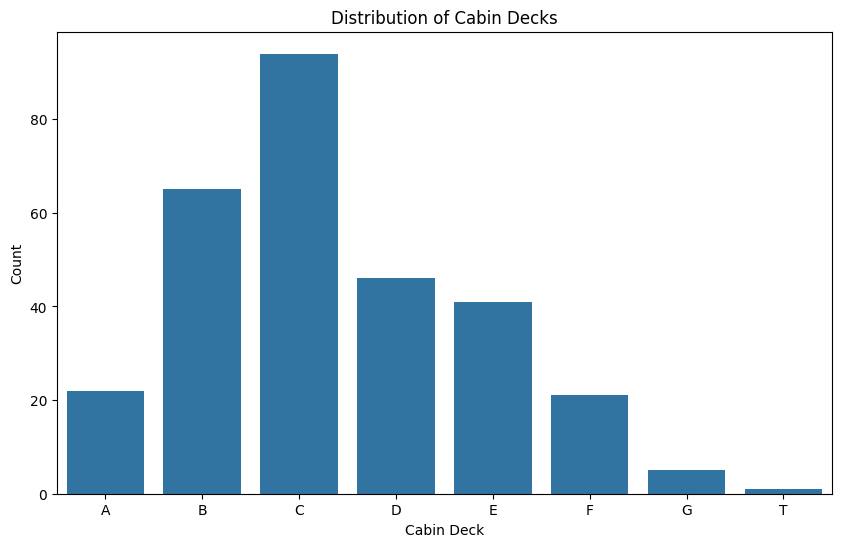

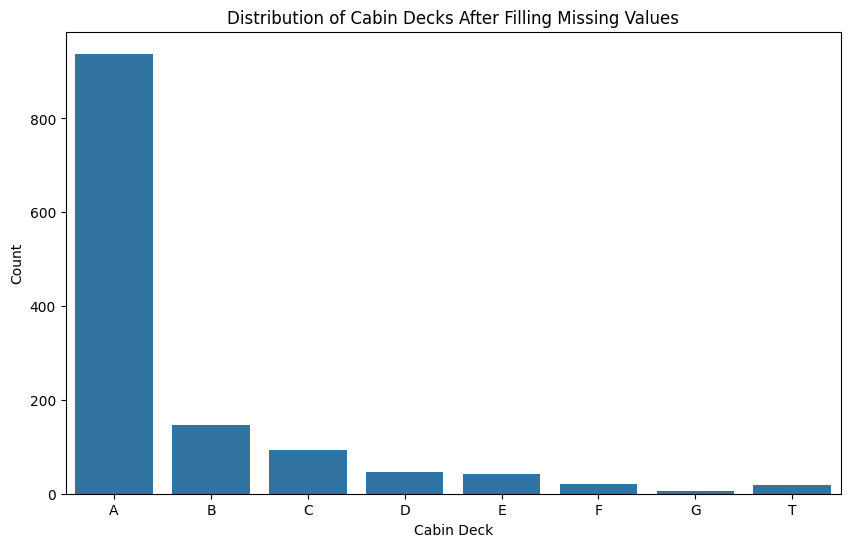

In [226]:
# Calculate the median fare for each cabin
titanic_df['cabin'] = titanic_df['cabin'].str[0]  # Extract the first letter of the cabin
average_fare_per_cabin = titanic_df.groupby('cabin')['fare'].median().to_dict()

# Plot the distribution of cabin decks based on the first letter
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='cabin', order=sorted(titanic_df['cabin'].dropna().unique()))
plt.title('Distribution of Cabin Decks')
plt.xlabel('Cabin Deck')
plt.ylabel('Count')
plt.show()

# Function to assign cabin based on fare price
def assign_cabin(fare):
    for cabin, median_fare in average_fare_per_cabin.items():
        if fare <= median_fare:
            return cabin
    return 'T'  # Assign 'T' if fare is higher than all median fares

# Fill missing cabin values based on fare price
titanic_df['cabin'] = titanic_df.apply(
    lambda row: assign_cabin(row['fare']) if pd.isnull(row['cabin']) else row['cabin'],
    axis=1
)

# Plot the distribution of cabin decks after filling missing values
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='cabin', order=sorted(titanic_df['cabin'].unique()))
plt.title('Distribution of Cabin Decks After Filling Missing Values')
plt.xlabel('Cabin Deck')
plt.ylabel('Count')
plt.show()

In [227]:
# Display the updated dataset information
print(titanic_df.info(verbose=True))

# Show columns with missing values
columns_with_missing_values = titanic_df.columns[titanic_df.isnull().any()]
print("\nColumns with Missing Values:")
print(columns_with_missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   cabin     1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB
None

Columns with Missing Values:
Index([], dtype='object')


# Task 3: Encoding Categorical Variables

In [228]:
# Perform one-hot encoding for the 'pclass' column
titanic_df = pd.get_dummies(titanic_df, columns=['pclass'], drop_first=True)

In [229]:
# Perform one-hot encoding for the 'sex' column
titanic_df = pd.get_dummies(titanic_df, columns=['sex'], drop_first=True)

In [230]:
print(titanic_df.columns)
print(titanic_df.head())

Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'pclass_2',
       'pclass_3', 'sex_male'],
      dtype='object')
   survived      age  sibsp  parch      fare cabin  pclass_2  pclass_3  \
0         1  29.0000      0      0  211.3375     B     False     False   
1         1   0.9167      1      2  151.5500     C     False     False   
2         0   2.0000      1      2  151.5500     C     False     False   
3         0  30.0000      1      2  151.5500     C     False     False   
4         0  25.0000      1      2  151.5500     C     False     False   

   sex_male  
0     False  
1      True  
2     False  
3      True  
4     False  


# Task 4: Feature Scaling

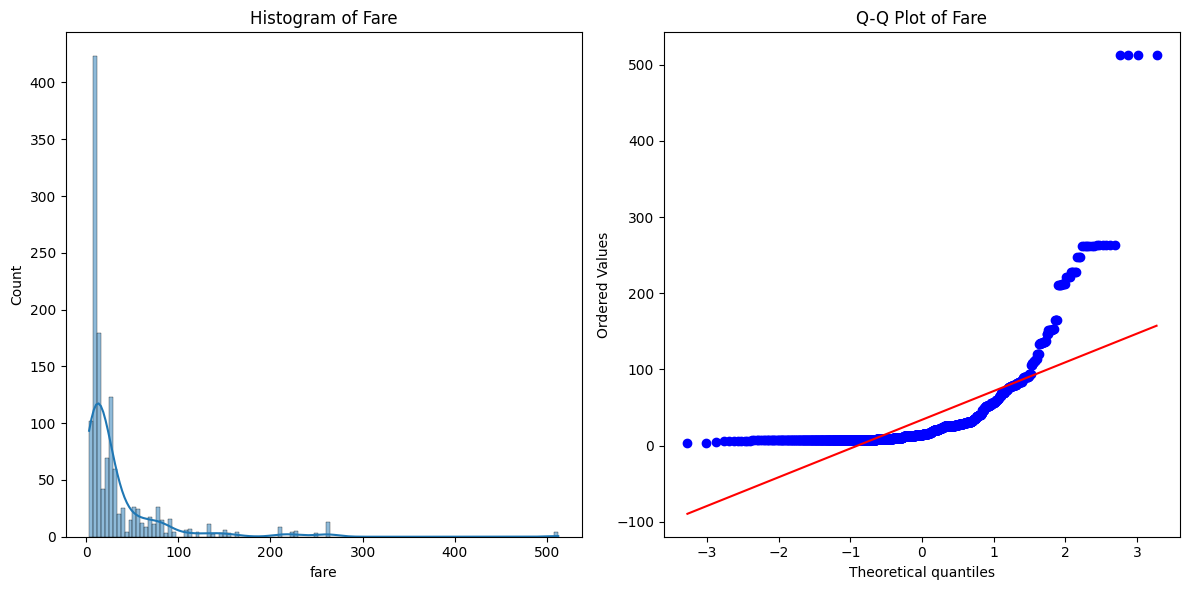

In [231]:
# Plot histogram of the 'fare' column
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(titanic_df['fare'], kde=True)
plt.title('Histogram of Fare')

# Plot Q-Q plot of the 'fare' column
plt.subplot(1, 2, 2)
stats.probplot(titanic_df['fare'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Fare')

plt.tight_layout()
plt.show()

In [232]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Perform standardized scaling for the 'fare' column
titanic_df['fare_scaled'] = scaler.fit_transform(titanic_df[['fare']])

# Display the first few rows of the updated dataset
print(titanic_df[['fare', 'fare_scaled']].head())

       fare  fare_scaled
0  211.3375     3.428103
1  151.5500     2.273013
2  151.5500     2.273013
3  151.5500     2.273013
4  151.5500     2.273013


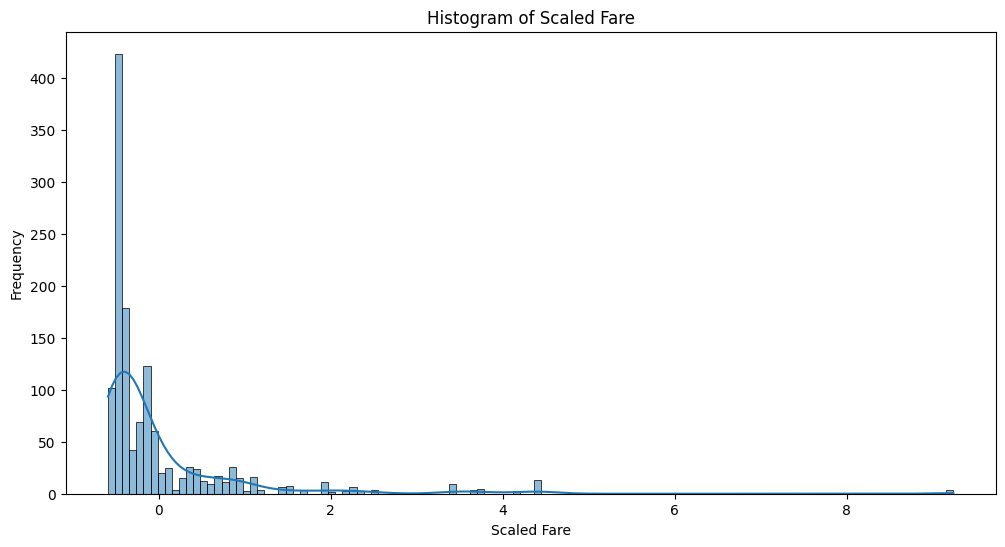

In [233]:
# Plot histogram of the 'fare_scaled' column
plt.figure(figsize=(12, 6))
sns.histplot(titanic_df['fare_scaled'], kde=True)
plt.title('Histogram of Scaled Fare')
plt.xlabel('Scaled Fare')
plt.ylabel('Frequency')
plt.show()

In [234]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

# Perform MinMax scaling for the 'age' column
titanic_df['age_scaled'] = minmax_scaler.fit_transform(titanic_df[['age']])

# Display the first few rows of the updated dataset
print(titanic_df[['age', 'age_scaled']].head())

# Drop the 'age' column as it is now scaled
titanic_df.drop(columns=['age'], inplace=True)

       age  age_scaled
0  29.0000    0.361169
1   0.9167    0.009395
2   2.0000    0.022964
3  30.0000    0.373695
4  25.0000    0.311064


In [235]:
print(titanic_df.columns)
print(titanic_df.head())

Index(['survived', 'sibsp', 'parch', 'fare', 'cabin', 'pclass_2', 'pclass_3',
       'sex_male', 'fare_scaled', 'age_scaled'],
      dtype='object')
   survived  sibsp  parch      fare cabin  pclass_2  pclass_3  sex_male  \
0         1      0      0  211.3375     B     False     False     False   
1         1      1      2  151.5500     C     False     False      True   
2         0      1      2  151.5500     C     False     False     False   
3         0      1      2  151.5500     C     False     False      True   
4         0      1      2  151.5500     C     False     False     False   

   fare_scaled  age_scaled  
0     3.428103    0.361169  
1     2.273013    0.009395  
2     2.273013    0.022964  
3     2.273013    0.373695  
4     2.273013    0.311064  


# Task 5: Data Splitting

Training set size: 654
Validation set size: 393
Testing set size: 262


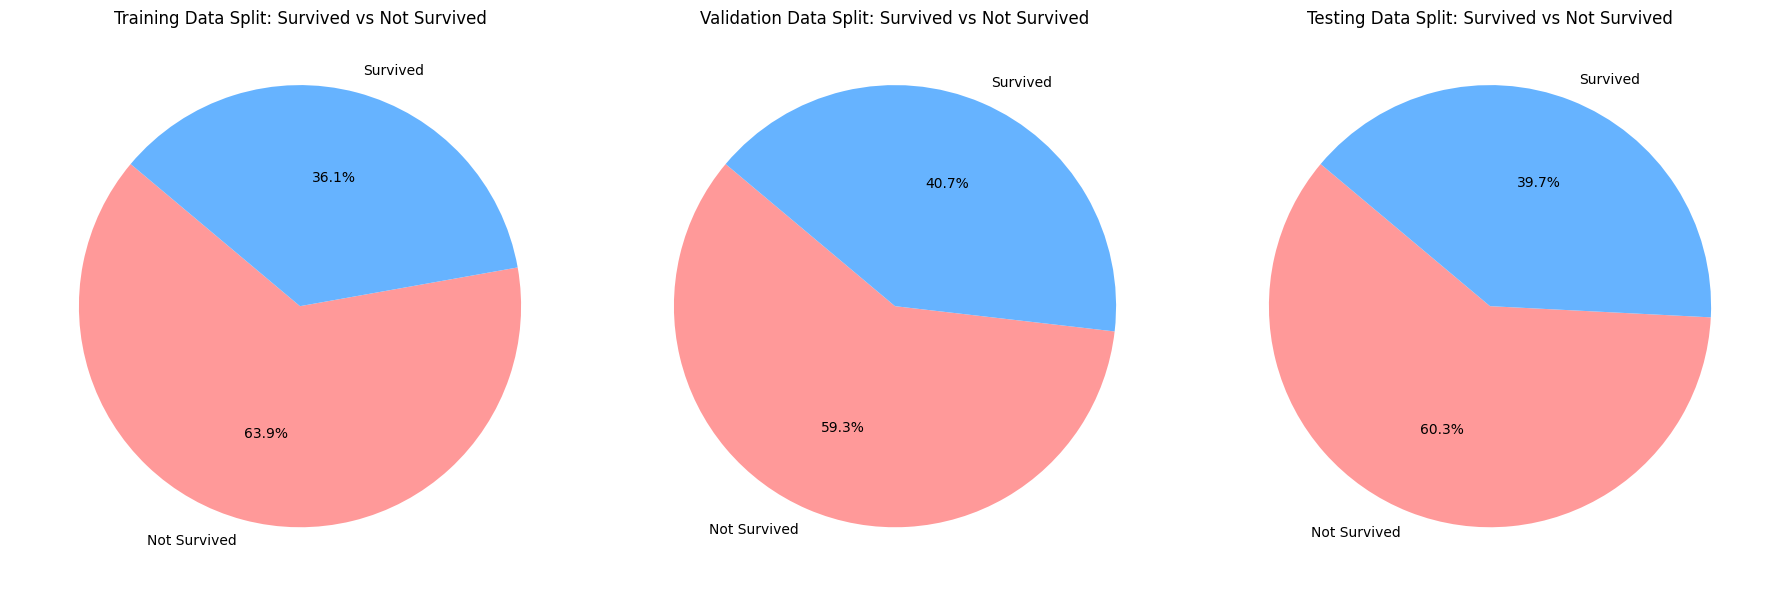

In [236]:
# Preprocess the data to convert categorical features to numeric values
X = pd.get_dummies(titanic_df.drop(columns=['survived']))
y = titanic_df['survived']

# Split the dataset into training (50%) and temp (50%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)

# Split the temp set into validation (60% of temp, which is 30% of original) and testing (40% of temp, which is 20% of original) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Display the sizes of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Function to plot pie chart for survived/!survived
def plot_survival_pie_chart(data, title, ax):
    survival_counts = data.value_counts()
    ax.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    ax.set_title(title)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot pie charts for each dataset
plot_survival_pie_chart(y_train, 'Training Data Split: Survived vs Not Survived', axes[0])
plot_survival_pie_chart(y_val, 'Validation Data Split: Survived vs Not Survived', axes[1])
plot_survival_pie_chart(y_test, 'Testing Data Split: Survived vs Not Survived', axes[2])

plt.tight_layout()
plt.show()

# Task 6: Adressing Class Imbalance

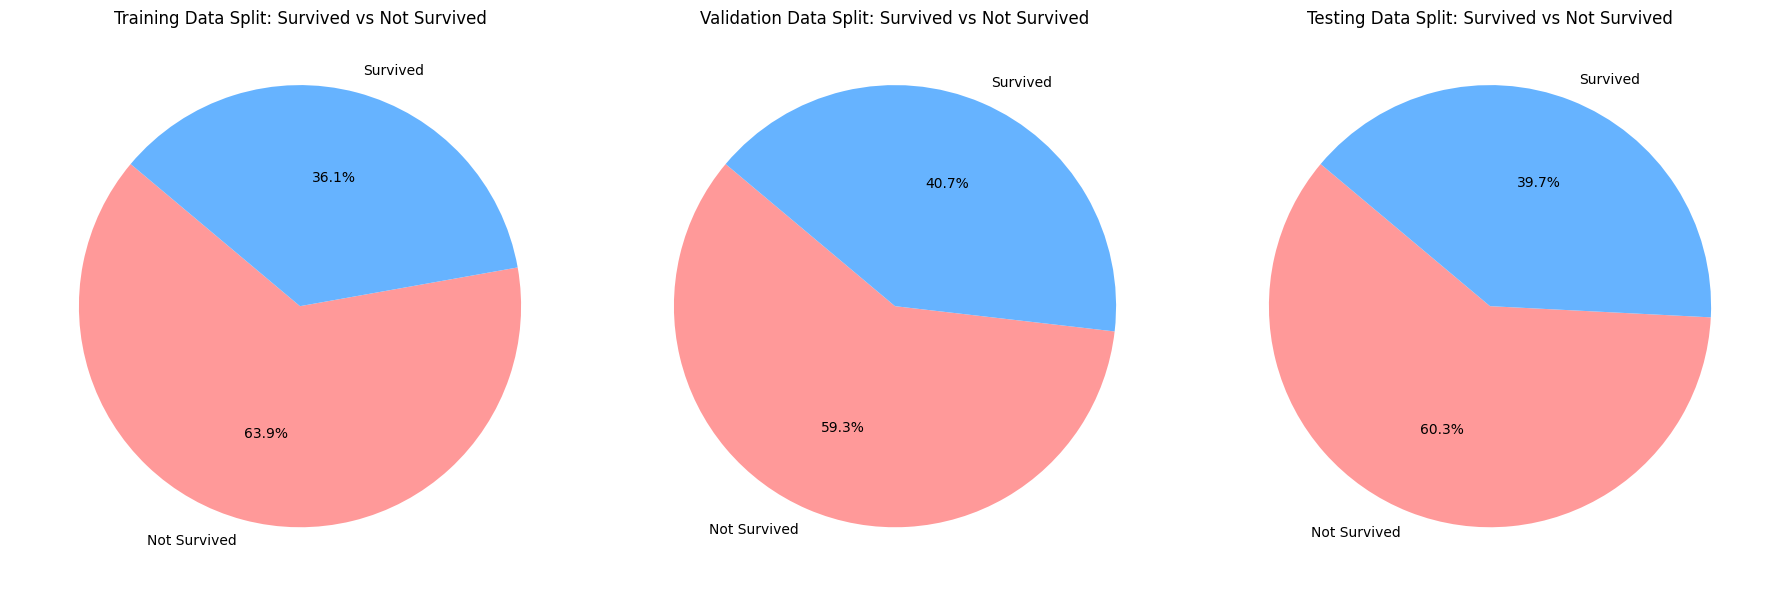

In [237]:
# Count the number of survivors and non-survivors in the training set
survival_counts = y_train.value_counts()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot pie charts for each dataset
plot_survival_pie_chart(y_train, 'Training Data Split: Survived vs Not Survived', axes[0])
plot_survival_pie_chart(y_val, 'Validation Data Split: Survived vs Not Survived', axes[1])
plot_survival_pie_chart(y_test, 'Testing Data Split: Survived vs Not Survived', axes[2])

plt.tight_layout()
plt.show()

In [238]:
# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Display the sizes of the original and resampled training sets
print(f"Original training set size: {X_train.shape[0]}")
print(f"Resampled training set size: {X_train_smote.shape[0]}")

# Display the distribution of the target variable in the resampled training set
print("\nDistribution of the target variable in the resampled training set:")
print(y_train_smote.value_counts())

Original training set size: 654
Resampled training set size: 836

Distribution of the target variable in the resampled training set:
survived
0    418
1    418
Name: count, dtype: int64


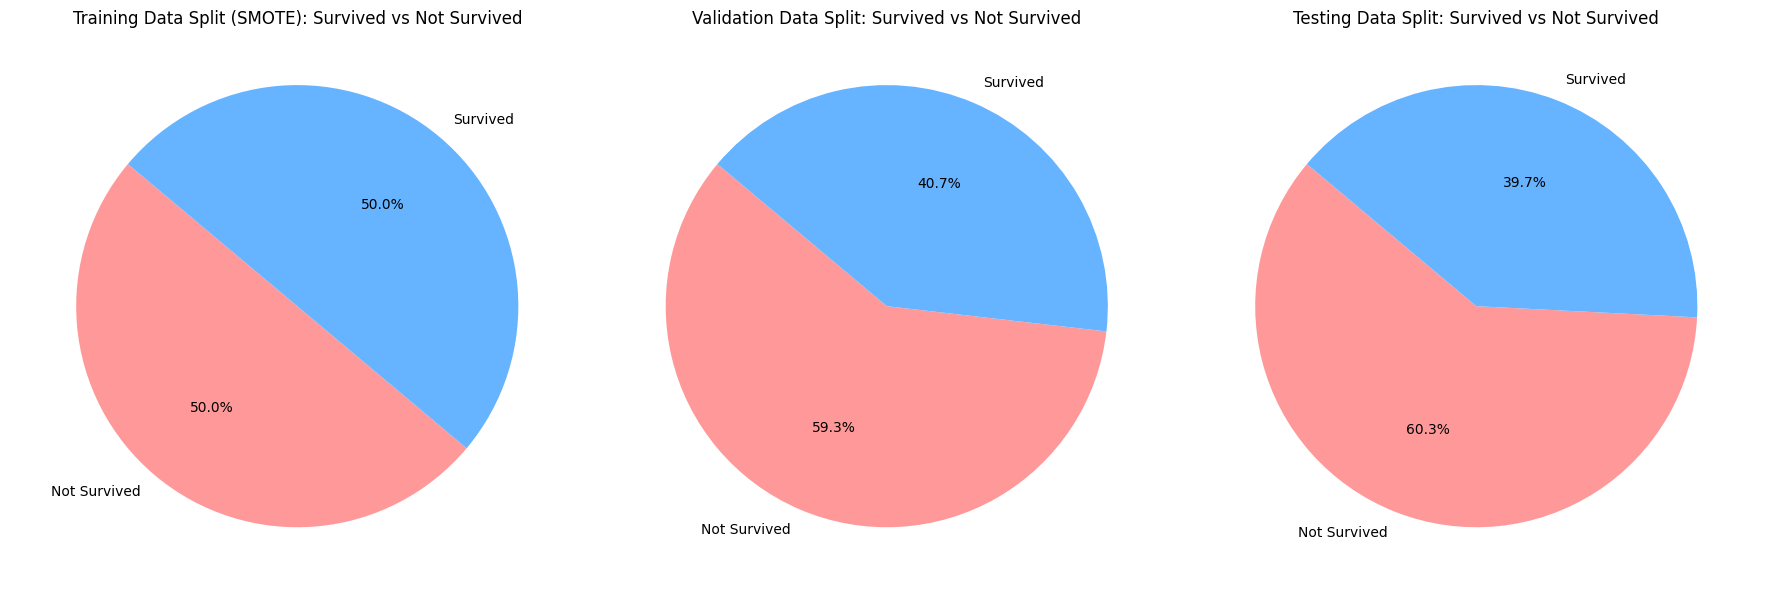

In [239]:
# Count the number of survivors and non-survivors in the new dataset
survival_counts_smote = y_train_smote.value_counts()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot pie charts for each dataset
plot_survival_pie_chart(y_train_smote, 'Training Data Split (SMOTE): Survived vs Not Survived', axes[0])
plot_survival_pie_chart(y_val, 'Validation Data Split: Survived vs Not Survived', axes[1])
plot_survival_pie_chart(y_test, 'Testing Data Split: Survived vs Not Survived', axes[2])

plt.tight_layout()
plt.show()

# Task 7: Feature Selection

In [240]:
print(X_train_smote.columns)
print(X_train_smote.head())

Index(['sibsp', 'parch', 'fare', 'pclass_2', 'pclass_3', 'sex_male',
       'fare_scaled', 'age_scaled', 'cabin_A', 'cabin_B', 'cabin_C', 'cabin_D',
       'cabin_E', 'cabin_F', 'cabin_G', 'cabin_T'],
      dtype='object')
   sibsp  parch     fare  pclass_2  pclass_3  sex_male  fare_scaled  \
0      0      0  13.0000      True     False      True    -0.403761   
1      1      0  26.0000      True     False     False    -0.152602   
2      2      0   7.9250     False      True      True    -0.501810   
3      0      0   7.7375     False      True     False    -0.505432   
4      1      2  23.4500     False      True     False    -0.201868   

   age_scaled  cabin_A  cabin_B  cabin_C  cabin_D  cabin_E  cabin_F  cabin_G  \
0    0.524008     True    False    False    False    False    False    False   
1    0.448852     True    False    False    False    False    False    False   
2    0.348643     True    False    False    False    False    False    False   
3    0.336117     True    Fals

In [241]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42)
boruta_selector.fit(X_train_smote.values, y_train_smote.values)

selected_features = X_train_smote.columns[boruta_selector.support_].to_list()
print("Selected Features:", selected_features)

Selected Features: ['fare', 'sex_male', 'fare_scaled', 'age_scaled']


# Task 8:Traning a Logistic Regression Model


In [ ]:
%%time
import joblib

# Initialize the logistic regression model with multiprocessing
lr = LogisticRegression(max_iter=3000, random_state=42, verbose=0, n_jobs=-1)

# Train the model on the selected features
lr.fit(X_train_smote[selected_features], y_train_smote)

if DEBUG:
    joblib.dump(lr, 'logistic_regression_model.pkl')

CPU times: total: 78.1 ms
Wall time: 202 ms


Validation Accuracy: 0.7760814249363868
Confusion Matrix:
[[193  40]
 [ 48 112]]


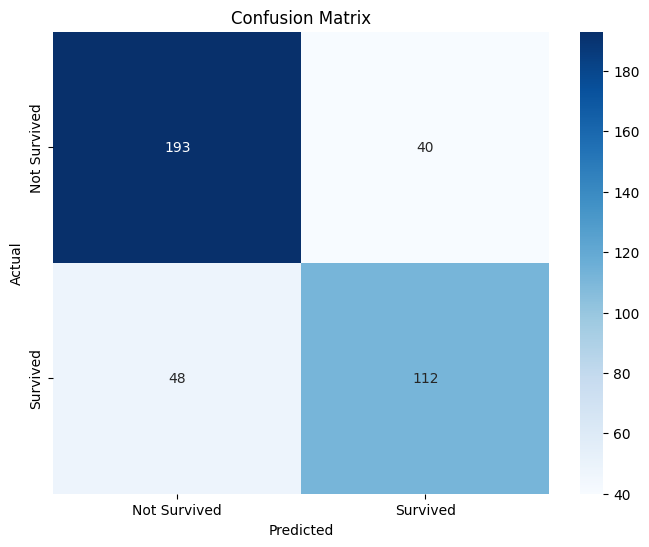

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       233
           1       0.74      0.70      0.72       160

    accuracy                           0.78       393
   macro avg       0.77      0.76      0.77       393
weighted avg       0.77      0.78      0.78       393



In [243]:
import joblib

# Load the trained model from a file if DEBUG is True
if DEBUG:
    lr = joblib.load('logistic_regression_model.pkl')

# Make predictions on the validation set
y_val_pred = lr.predict(X_val[selected_features])

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")

# Display the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display the classification report
cr = classification_report(y_val, y_val_pred)
print("Classification Report:")
print(cr)

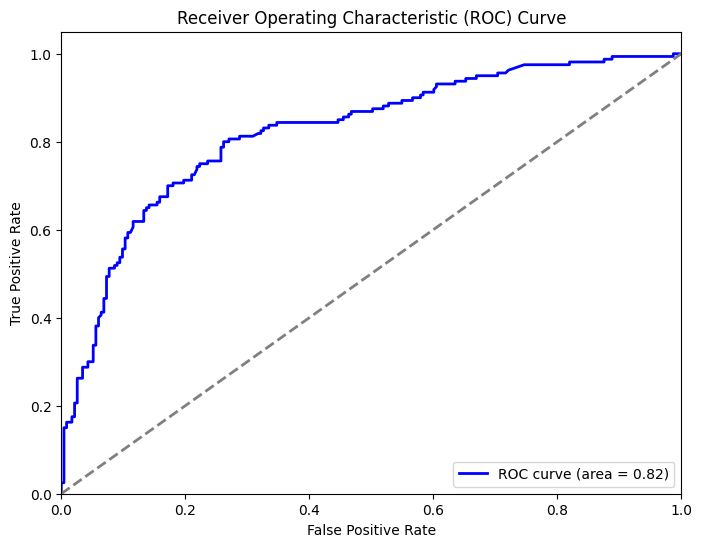

In [ ]:
import joblib
from sklearn.metrics import roc_curve, auc

# Load the trained model from a file if DEBUG is True
if DEBUG:
    lr = joblib.load('logistic_regression_model.pkl')

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val[selected_features])[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()